In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [ ]:
from keras.datasets import mnist

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
from sklearn.model_selection import train_test_split
#объединяем в один набор
X=np.concatenate((X_train,X_test))
y=np.concatenate((y_train,y_test))
#разбиваем по вариантам
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=10000,train_size=60000,random_state=11)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
#вывод размерностей
print('Shape of X train:',X_train.shape)
print('Shape of y train:',y_train.shape)

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)


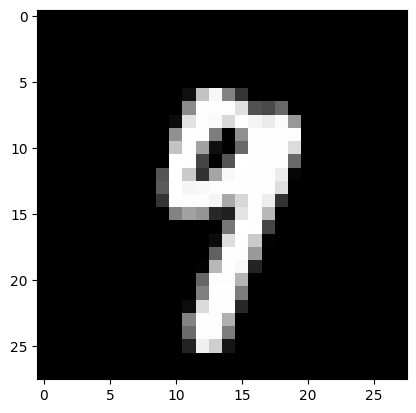

9


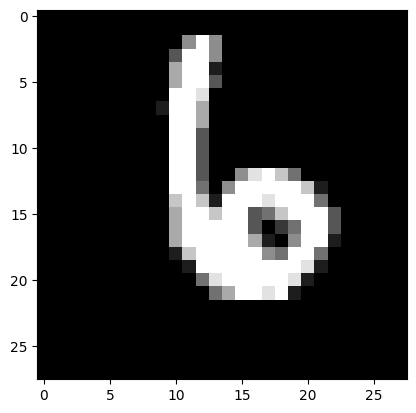

6


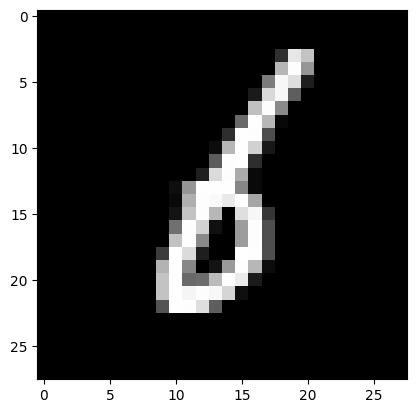

6


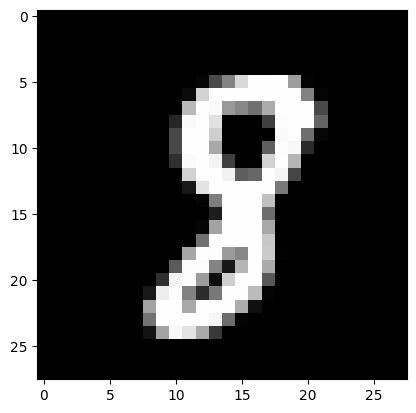

8


In [ ]:
#вывод изображения
plt.imshow(X_train[1],cmap=plt.get_cmap('gray'))
plt.show()
print(y_train[1])

plt.imshow(X_train[2],cmap=plt.get_cmap('gray'))
plt.show()
print(y_train[2])

plt.imshow(X_train[3],cmap=plt.get_cmap('gray'))
plt.show()
print(y_train[3])

plt.imshow(X_train[4],cmap=plt.get_cmap('gray'))
plt.show()
print(y_train[4])

In [ ]:
#развернем каждое изображение 8*228 в вектор 784
num_pixels=X_train.shape[1]*X_train.shape[2]
X_train=X_train.reshape(X_train.shape[0],num_pixels) / 255
X_test=X_test.reshape(X_test.shape[0],num_pixels) / 255
print('Shape of transformed X train:',X_train.shape)

Shape of transformed X train: (60000, 784)


In [ ]:
#переведем метки в one-hot
import keras.utils
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)
print('Shape of transformed y train:',y_train.shape)
num_classes=y_train.shape[1]

Shape of transformed y train: (60000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model_1 = Sequential()
model_1.add(Dense(units=num_classes, input_dim=num_pixels, activation='softmax'))
model_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# вывод информации об архитектуре модели
print(model_1.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Обучаем модель
H = model_1.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6924 - loss: 1.1951 - val_accuracy: 0.8775 - val_loss: 0.5033
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8750 - loss: 0.4945 - val_accuracy: 0.8910 - val_loss: 0.4130
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8868 - loss: 0.4267 - val_accuracy: 0.8982 - val_loss: 0.3762
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8957 - loss: 0.3878 - val_accuracy: 0.9040 - val_loss: 0.3548
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8996 - loss: 0.3671 - val_accuracy: 0.9060 - val_loss: 0.3400
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9047 - loss: 0.3520 - val_accuracy: 0.9078 - val_loss: 0.3298
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9052 - loss: 0.3455 - val_accuracy: 0.9093 - val_loss: 0.3222
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9060 - loss: 0.3435 -

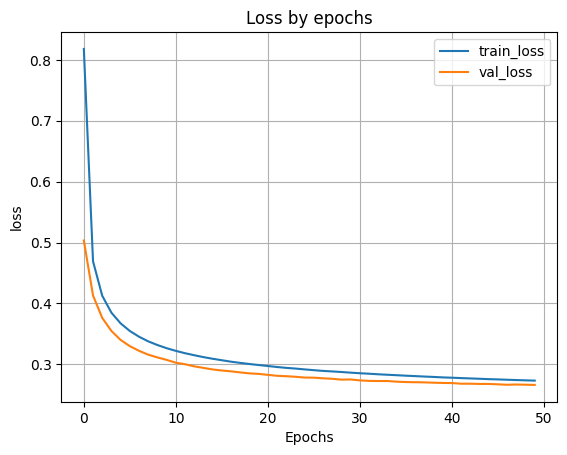

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model_1.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9219 - loss: 0.2787
Loss on test data: 0.2803967595100403
Accuracy on test data: 0.9203000068664551


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5381 - loss: 1.9126 - val_accuracy: 0.8087 - val_loss: 0.9749
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8265 - loss: 0.8623 - val_accuracy: 0.8630 - val_loss: 0.6228
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8605 - loss: 0.6000 - val_accuracy: 0.8820 - val_loss: 0.4961
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8774 - loss: 0.4944 - val_accuracy: 0.8940 - val_loss: 0.4310
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8871 - loss: 0.4343 - val_accuracy: 0.9012 - val_loss: 0.3918
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8920 - loss: 0.4062 - val_accuracy: 0.9023 - val_loss: 0.3659
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8970 - loss: 0.3845 - val_accuracy: 0.9057 - val_loss: 0.3470
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9016 - loss: 0.

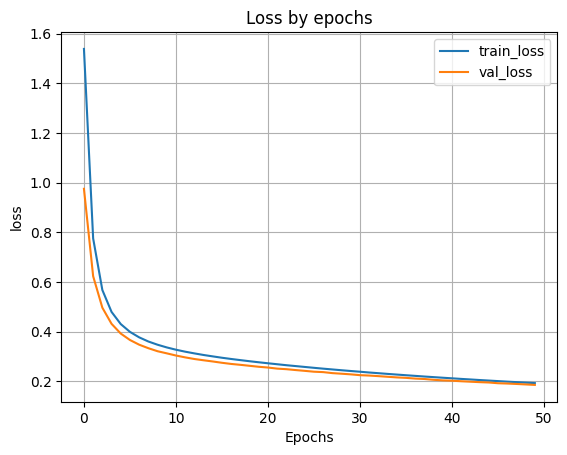

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9416 - loss: 0.1984
Loss on test data: 0.19959478080272675
Accuracy on test data: 0.9416999816894531


In [ ]:
model_2 = Sequential()
model_2.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
model_2.add(Dense(units=num_classes, activation='softmax'))
model_2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

print(model_2.summary())

H_2 = model_2.fit(X_train, y_train, validation_split=0.1, epochs=50)

# вывод графика ошибки по эпохам
plt.plot(H_2.history['loss'])
plt.plot(H_2.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

# Оценка качества работы модели на тестовых данных
scores = model_2.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,510 (931.68 KB)

 Trainable params: 238,510 (931.68 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5441 - loss: 1.7974 - val_accuracy: 0.8262 - val_loss: 0.8458
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8401 - loss: 0.7551 - val_accuracy: 0.8723 - val_loss: 0.5551
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8712 - loss: 0.5370 - val_accuracy: 0.8888 - val_loss: 0.4523
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8813 - loss: 0.4575 - val_accuracy: 0.8987 - val_loss: 0.4022
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8888 - loss: 0.4144 - val_accuracy: 0.9017 - val_loss: 0.3716
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8959 - loss: 0.3869 - val_accuracy: 0.9050 - val_loss: 0.3520
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8968 - loss: 0.3717 - val_accuracy: 0.9070 - val_loss: 0.3369
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8992 - loss: 0.35

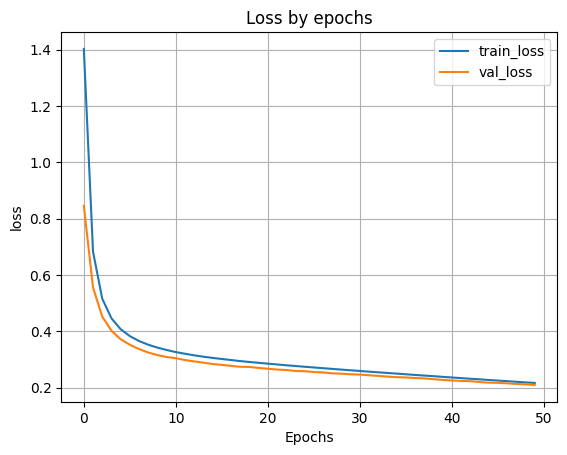

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9337 - loss: 0.2223
Loss on test data: 0.224356010556221
Accuracy on test data: 0.9345999956130981


In [ ]:
model_3 = Sequential()
model_3.add(Dense(units=300, input_dim=num_pixels, activation='sigmoid'))
model_3.add(Dense(units=num_classes, activation='softmax'))
model_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

print(model_3.summary())

H_3 = model_3.fit(X_train, y_train, validation_split=0.1, epochs=50)

# вывод графика ошибки по эпохам
plt.plot(H_3.history['loss'])
plt.plot(H_3.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

# Оценка качества работы модели на тестовых данных
scores = model_3.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 397,510 (1.52 MB)

 Trainable params: 397,510 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5638 - loss: 1.7612 - val_accuracy: 0.8435 - val_loss: 0.8013
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8456 - loss: 0.7243 - val_accuracy: 0.8770 - val_loss: 0.5333
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8735 - loss: 0.5205 - val_accuracy: 0.8895 - val_loss: 0.4400
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8837 - loss: 0.4442 - val_accuracy: 0.8958 - val_loss: 0.3946
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8904 - loss: 0.4080 - val_accuracy: 0.8998 - val_loss: 0.3667
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8913 - loss: 0.3851 - val_accuracy: 0.9023 - val_loss: 0.3510
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8972 - loss: 0.3645 - val_accuracy: 0.9082 - val_loss: 0.3334
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8988 - loss: 0.3

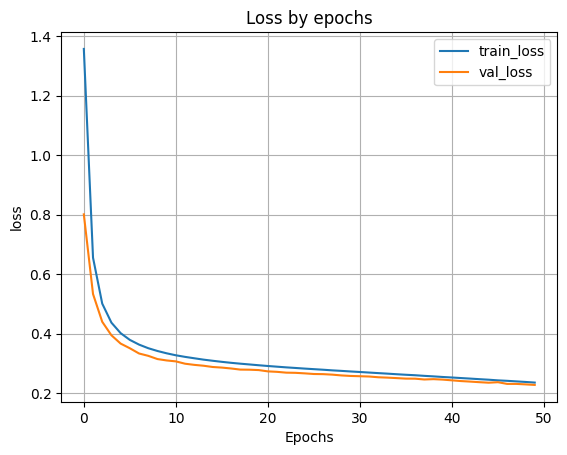

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9269 - loss: 0.2416
Loss on test data: 0.2432917207479477
Accuracy on test data: 0.9279000163078308


In [ ]:
model_4 = Sequential()
model_4.add(Dense(units=500, input_dim=num_pixels, activation='sigmoid'))
model_4.add(Dense(units=num_classes, activation='softmax'))
model_4.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

print(model_4.summary())

H_4 = model_4.fit(X_train, y_train, validation_split=0.1, epochs=50)

# вывод графика ошибки по эпохам
plt.plot(H_4.history['loss'])
plt.plot(H_4.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

# Оценка качества работы модели на тестовых данных
scores = model_4.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1903 - loss: 2.2760 - val_accuracy: 0.4533 - val_loss: 2.0793
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5093 - loss: 1.9647 - val_accuracy: 0.6495 - val_loss: 1.5316
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6871 - loss: 1.3907 - val_accuracy: 0.7460 - val_loss: 1.0405
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7685 - loss: 0.9697 - val_accuracy: 0.8002 - val_loss: 0.7932
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8100 - loss: 0.7666 - val_accuracy: 0.8290 - val_loss: 0.6531
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8349 - loss: 0.6397 - val_accuracy: 0.8560 - val_loss: 0.5589
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8532 - loss: 0.5624 - val_accuracy: 0.8730 - val_loss: 0.4947
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8683 - loss: 0.49

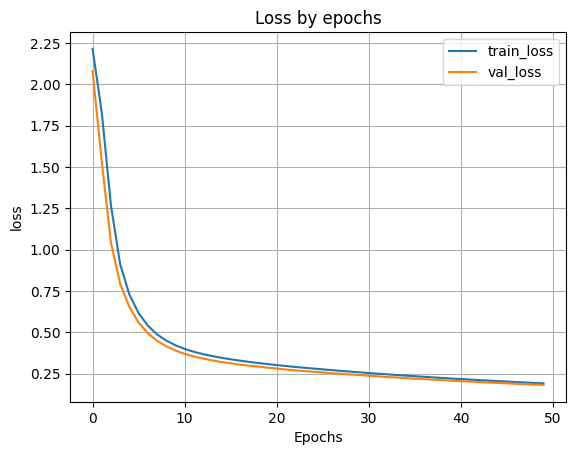

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9384 - loss: 0.1992
Loss on test data: 0.19695913791656494
Accuracy on test data: 0.9402999877929688


In [ ]:
model_5 = Sequential()
model_5.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
model_5.add(Dense(units=50, activation='sigmoid'))
model_5.add(Dense(units=num_classes, activation='softmax'))
model_5.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

print(model_5.summary())

H_5 = model_5.fit(X_train, y_train, validation_split=0.1, epochs=50)

# вывод графика ошибки по эпохам
plt.plot(H_5.history['loss'])
plt.plot(H_5.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

# Оценка качества работы модели на тестовых данных
scores = model_5.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1980 - loss: 2.2730 - val_accuracy: 0.5065 - val_loss: 2.1019
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5667 - loss: 1.9901 - val_accuracy: 0.6553 - val_loss: 1.5055
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6975 - loss: 1.3598 - val_accuracy: 0.7752 - val_loss: 0.9847
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7810 - loss: 0.9302 - val_accuracy: 0.8133 - val_loss: 0.7424
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8202 - loss: 0.7221 - val_accuracy: 0.8462 - val_loss: 0.6048
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8476 - loss: 0.5961 - val_accuracy: 0.8688 - val_loss: 0.5186
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8590 - loss: 0.5267 - val_accuracy: 0.8785 - val_loss: 0.4602
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8734 - loss: 0.47

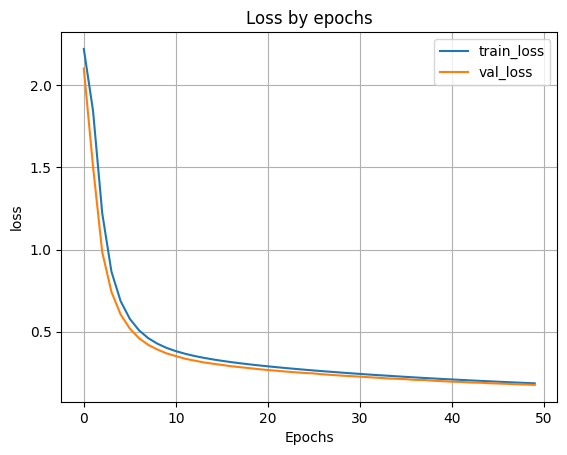

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9395 - loss: 0.1940
Loss on test data: 0.19388720393180847
Accuracy on test data: 0.9420999884605408


In [ ]:
model_5 = Sequential()
model_5.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
model_5.add(Dense(units=100, activation='sigmoid'))
model_5.add(Dense(units=num_classes, activation='softmax'))
model_5.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

print(model_5.summary())

H_5 = model_5.fit(X_train, y_train, validation_split=0.1, epochs=50)

# вывод графика ошибки по эпохам
plt.plot(H_5.history['loss'])
plt.plot(H_5.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

# Оценка качества работы модели на тестовых данных
scores = model_5.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

In [ ]:
model_5.save('best_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
NN output: [[5.0932199e-01 3.2454227e-05 3.3057046e-03 5.1869772e-02 2.3799451e-04
  5.4319475e-02 6.6690765e-05 1.3238982e-02 1.5642552e-01 2.1118149e-01]]


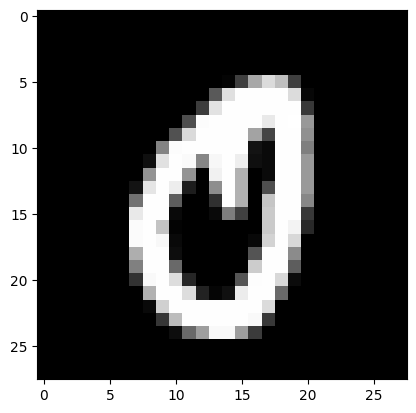

Real mark:  0
NN answer:  0


In [ ]:
# вывод тестового изображения и результата распознавания 1
n = 123
result = model_5.predict(X_test[n:n+1])
print('NN output:', result)
plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
NN output: [[1.4791858e-06 9.4321764e-01 2.4574984e-02 9.0776198e-03 2.5022458e-04
  1.8704976e-03 1.4549885e-04 8.7578883e-03 1.1556224e-02 5.4802326e-04]]


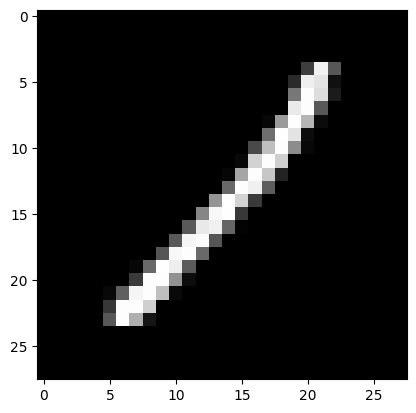

Real mark:  1
NN answer:  1


In [ ]:
# вывод тестового изображения и результата распознавания 2
n = 111
result = model_5.predict(X_test[n:n+1])
print('NN output:', result)
9
plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))


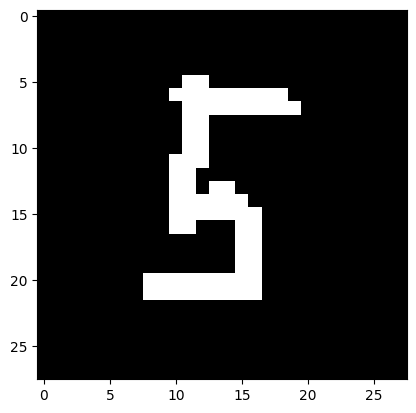

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
I think it's  5


In [33]:
# загрузка собственного изображения
from PIL import Image
file_data = Image.open('5.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)

# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img = test_img / 255
test_img = test_img.reshape(1, num_pixels)
# распознавание
result = model_5.predict(test_img)
print('I think it\'s ', np.argmax(result))

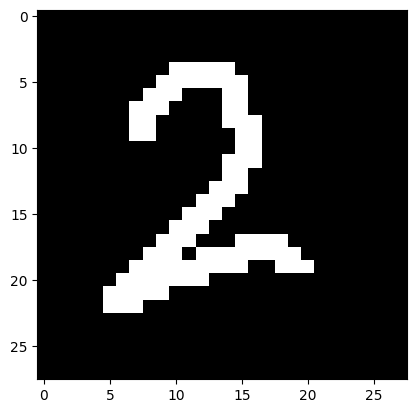

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
I think it's  2


In [34]:
file_data = Image.open('2.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)

# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img = test_img / 255
test_img = test_img.reshape(1, num_pixels)
# распознавание
result = model_5.predict(test_img)
print('I think it\'s ', np.argmax(result))

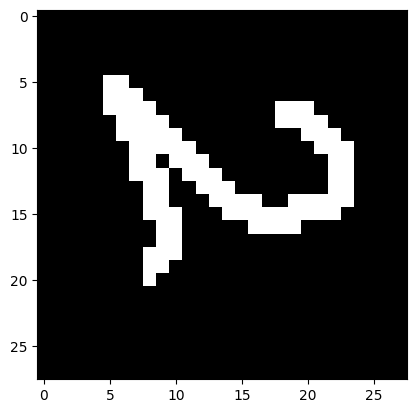

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
I think it's  4


In [35]:
file_data = Image.open('2_1.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)

# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img = test_img / 255
test_img = test_img.reshape(1, num_pixels)
# распознавание
result = model_5.predict(test_img)
print('I think it\'s ', np.argmax(result))

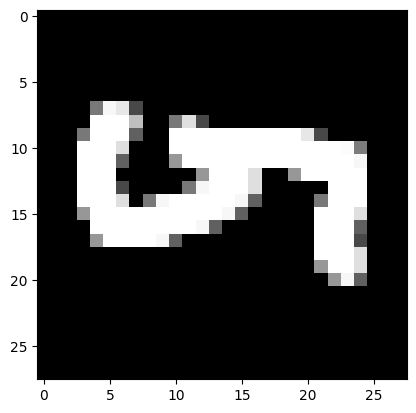

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
I think it's  7


In [36]:
file_data = Image.open('5_1.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)

# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img = test_img / 255
test_img = test_img.reshape(1, num_pixels)
# распознавание
result = model_5.predict(test_img)
print('I think it\'s ', np.argmax(result))